In [1]:
from json import load
from pathlib import PurePath
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s
import wordcloud as wordcloud
from wordcloud import STOPWORDS
from PIL import Image
import json
import csv

In [2]:
user_json_path = PurePath("../../data/user_json_files/")
user_raw_path = PurePath("../../data/clarkson2_files/")
user_list = [user for user in os.listdir(user_raw_path) if user != ".DS_Store"]

In [5]:
ocnt = "occurence_count"
tvec = "timing_vectors"

write_lst = [[]for _ in range(50)]
for i in range(len(user_list)):
    path_to_user = PurePath(user_json_path, PurePath(f"user_{user_list[i]}.json"))

    with open(path_to_user, "r") as f:
        user_dict = load(f)

    word_occurences = [(key, user_dict[key][ocnt]) for key in user_dict]

    

    sorted_word_occurences = sorted(tuple(filter(lambda x: len(x[0]) > 1, [(key, user_dict[key][ocnt]) for key in user_dict])), key = lambda x: x[1], reverse=True)
    if len(sorted_word_occurences) < 50:
        continue 
    #word = [f"{sorted_word_occurences[x][0]} "*(sorted_word_occurences[x][1]) for x in range(len(sorted_word_occurences))]
    else:
        for i in range(len(write_lst)):
            write_lst[i].append(f"{sorted_word_occurences[i][0]} - {sorted_word_occurences[i][1]}")
    
    # with open(f"wordcloud_data/txt_files/sorted_word_ocnt{user_list[i]}.txt", 'w') as f:
    #     writer = csv.writer(f, delimiter='\t')
    #     writer.writerow(sorted_word_occurences)
    #data = [np.loadtxt(f"wordcloud_data/txt_files/sorted_word_ocnt{user_list[i]}.txt", dtype = 'str')]
    


# df = pd.DataFrame(data)
# df

        
df = pd.DataFrame(write_lst)
df.to_csv("wordcloud_data/txt_files/most_common_words_by_user.csv")
df
   

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,THE - 568,THE - 1129,CLARKSON - 8,THE - 159,THE - 2602,THE - 1979,THE - 1138,THE - 82,OF - 230,THE - 91,...,THE - 164,THE - 138,THE - 235,THE - 363,THE - 175,THE - 1175,THE - 200,THE - 579,VS - 149,THE - 174
1,AND - 281,OF - 401,VEIN - 5,TO - 136,TO - 1979,TO - 1211,TO - 594,OF - 53,AND - 226,AND - 43,...,TO - 141,TO - 123,TO - 199,OF - 152,TO - 144,TO - 1002,TO - 120,OF - 395,LIST - 71,TO - 98
2,TO - 242,TO - 362,RED - 5,AND - 126,AND - 1421,AND - 1098,AND - 479,TO - 45,THE - 221,IN - 31,...,AND - 118,AND - 63,OF - 157,TO - 134,OF - 110,OF - 810,AND - 114,TO - 366,SS - 62,AND - 77
3,OF - 217,IN - 272,TO - 5,OF - 60,IT - 1411,OF - 979,OF - 415,IS - 27,FI - 217,IS - 30,...,YOU - 114,IN - 58,AND - 151,AND - 122,AND - 104,AND - 575,OF - 102,AND - 357,GET - 50,OF - 68
4,IS - 143,AND - 244,LAB - 4,FOR - 59,OF - 1147,IN - 736,IN - 343,THAT - 26,IN - 208,OF - 28,...,OF - 83,OF - 54,IN - 114,IN - 101,FOR - 64,IN - 488,IS - 89,IN - 241,ADMIN - 44,IN - 51
5,XX - 140,THIS - 194,THE - 4,BE - 53,THAT - 968,IT - 459,IS - 311,IT - 24,LD - 206,TO - 26,...,IT - 72,IT - 43,THAT - 102,WAR - 71,IN - 59,IS - 414,HE - 75,IS - 164,IS - 40,IS - 45
6,IN - 129,THAT - 184,FRAC - 4,YOU - 47,IS - 888,FOR - 451,FOR - 261,AND - 20,KI - 198,FOR - 21,...,IS - 71,THAT - 40,FOR - 66,FOR - 65,ON - 58,FOR - 357,THAT - 64,FOR - 138,FOR - 40,PROJECT - 45
7,BE - 111,WAS - 159,MOUNTAINVIEW - 3,IT - 47,BE - 787,YOU - 433,IT - 257,PV - 20,IL - 191,THIS - 16,...,IN - 65,WAS - 37,IS - 62,WAS - 53,IT - 53,THAT - 331,IN - 52,YOU - 122,THE - 39,THAT - 43
8,FOR - 89,IS - 151,NEW - 3,IS - 46,THIS - 694,SHE - 402,NOT - 212,YOU - 18,LK - 172,WAS - 16,...,THAT - 49,THEIR - 30,THIS - 61,IS - 46,YOU - 52,BE - 244,IT - 48,TEH - 117,YOU - 27,BE - 36
9,AS - 88,FOR - 132,MOODLE - 3,ON - 43,IN - 693,IS - 395,ON - 198,IN - 18,TO - 153,ON - 15,...,BE - 39,IS - 28,IT - 56,TH - 41,IS - 48,IT - 237,AS - 40,IT - 109,IT - 26,WILL - 28


In [4]:
word_occurences = [(key, aggregator[key]) for key in aggregator]
# word_occurences

NameError: name 'aggregator' is not defined

In [ ]:
sorted_word_occurences = sorted(tuple(filter(lambda x: len(x[0]) > 1, [(key, aggregator[key]) for key in aggregator])), key = lambda x: x[1], reverse=True)
word = [f"{sorted_word_occurences[i][0]} "*(sorted_word_occurences[i][1]) for i in range(len(sorted_word_occurences))]
concat = "".join(word)
text_write = open("wordcloud_data/txt_files/all_words.txt", "w")
text_to_file = text_write.write(concat)
text_write.close()
#concat

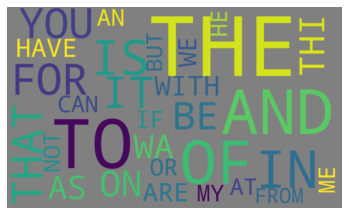

In [ ]:
#word cloud with txt file 
text = open('wordcloud_data/txt_files/all_words.txt').read()
stop_words = ["xxxx", "xxx", "xx","xxxxx"]
wc = wordcloud.WordCloud(max_words= 30,collocations= False, background_color='grey', height = 600, width = 1000, stopwords= stop_words)
wc.generate(text)

# save to file
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show
wc.to_file('wordcloud_data/wordclouds/wordcloud_output.png')